In [1]:
import numpy as np
import networkx as nx
from sympy import Matrix

In [2]:
a = np.array([[0, 1, 0, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0, 0], [0, 0, 0, 1, 0, 0, 0], [0, 0, 0, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0], [0, 0, 0, 0, 0, 0, 1], [1, 1, 1, 1, 1, 1, 1]])

In [3]:
m = Matrix(a)

In [4]:
m

Matrix([
[0, 1, 0, 0, 0, 0, 0],
[0, 0, 1, 0, 0, 0, 0],
[0, 0, 0, 1, 0, 0, 0],
[0, 0, 0, 0, 1, 0, 0],
[0, 0, 0, 0, 0, 1, 0],
[0, 0, 0, 0, 0, 0, 1],
[1, 1, 1, 1, 1, 1, 1]])

In [7]:
P, J = m.jordan_form()

MatrixError: Jordan normal form is not implemented if the matrix have eigenvalues in CRootOf form

In [8]:
m.eigenvals()

{CRootOf(lambda**7 - lambda**6 - lambda**5 - lambda**4 - lambda**3 - lambda**2 - lambda - 1, 0): 1,
 CRootOf(lambda**7 - lambda**6 - lambda**5 - lambda**4 - lambda**3 - lambda**2 - lambda - 1, 1): 1,
 CRootOf(lambda**7 - lambda**6 - lambda**5 - lambda**4 - lambda**3 - lambda**2 - lambda - 1, 2): 1,
 CRootOf(lambda**7 - lambda**6 - lambda**5 - lambda**4 - lambda**3 - lambda**2 - lambda - 1, 3): 1,
 CRootOf(lambda**7 - lambda**6 - lambda**5 - lambda**4 - lambda**3 - lambda**2 - lambda - 1, 4): 1,
 CRootOf(lambda**7 - lambda**6 - lambda**5 - lambda**4 - lambda**3 - lambda**2 - lambda - 1, 5): 1,
 CRootOf(lambda**7 - lambda**6 - lambda**5 - lambda**4 - lambda**3 - lambda**2 - lambda - 1, 6): 1}

In [24]:
evals, evecs = np.linalg.eig(a)

In [14]:
def jordan(a):
    e = a[:,0]  # eigenvalues
    m = a[:,1].astype('int')  # multiplicities
    d = np.repeat(e, m) # main diagonal
    ones = np.ones(d.size - 1)
    ones[np.cumsum(m)[:-1] -1] = 0
    j = np.diag(d) + np.diag(ones, k=1)
    return j


In [15]:
j = jordan(a)

In [16]:
jj = Matrix(j)

In [26]:
m.jordan_block(eigenvalue=1.9919642)

ValueError: Must supply a matrix size

In [31]:
evals

array([ 1.9919642 +0.j        ,  0.52886126+0.76534196j,
        0.52886126-0.76534196j, -0.78418702+0.36004972j,
       -0.78418702-0.36004972j, -0.24065634+0.849197j  ,
       -0.24065634-0.849197j  ])

In [32]:
import matplotlib.pyplot as plt

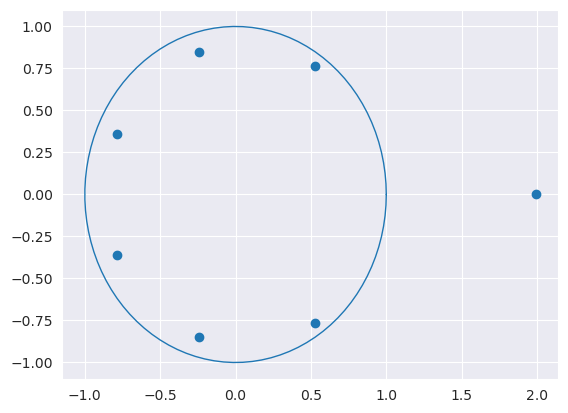

In [35]:
t = np.linspace(0,np.pi*2,100)
plt.scatter(evals.real, evals.imag)
plt.plot(np.cos(t), np.sin(t), linewidth=1)

In [14]:
def sweep(mm, k):
    n = mm.shape[0]
    temp = np.zeros_like(mm)
    for i in range(n):
        for j in range(n):
            if i == k and j == k:
                temp[i, j] = -1. / mm[k, k]
            elif i == k:
                temp[i, j] = mm[k, j] / mm[k, k]
            elif j == k:
                temp[i, j] = mm[i, k] / mm[k, k]
            else:
                temp[i, j] = mm[i, j] -  ((mm[i, k] * mm[k, j])/ mm[k, k])
    
    return temp
               

In [15]:
Matrix(sweep(a, 2))

/tmp/ipykernel_338217/883131456.py:13: RuntimeWarning: invalid value encountered in scalar divide
  temp[i, j] = mm[i, j] -  ((mm[i, k] * mm[k, j])/ mm[k, k])


ValueError: cannot convert float NaN to integer